<a href="https://colab.research.google.com/github/jrakhshanda55/Ausaf_ML/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction: A Multivariate Analysis

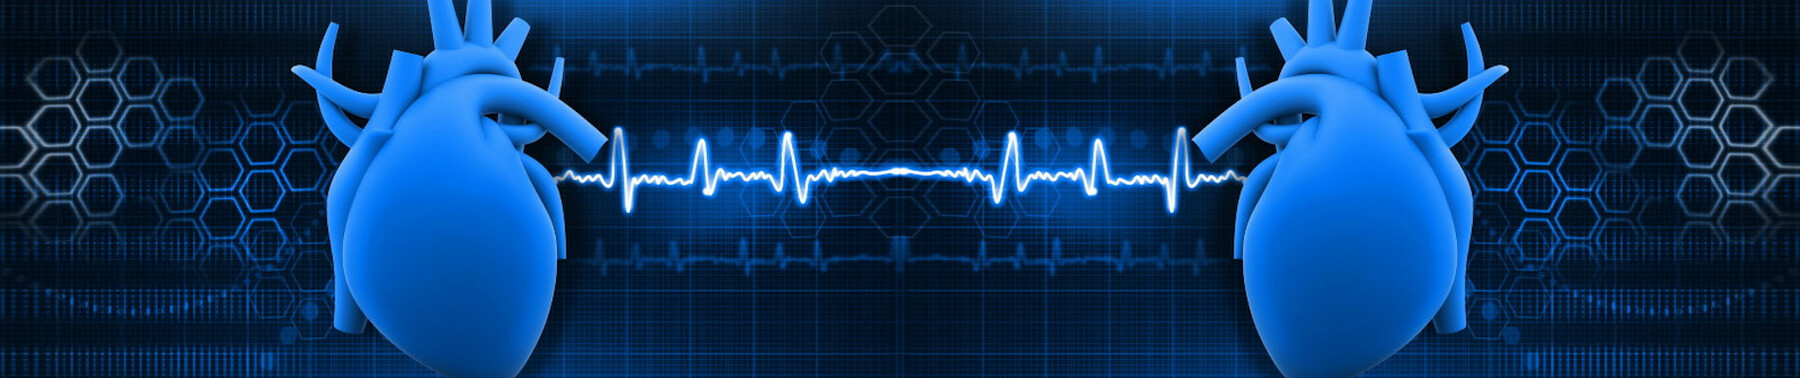

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
sns.set(style="whitegrid")

## 1. Introduction

In the realm of health and medical research, the utilization of machine learning and data analysis techniques has become imperative, offering insights that can revolutionize diagnostic and predictive capabilities. The Heart Disease UCI dataset, with its rich compilation of diverse attributes related to cardiovascular health, presents a unique opportunity for exploration.

Cardiovascular diseases remain a global health challenge, and the ability to predict and understand the factors contributing to heart disease is crucial for effective intervention and prevention. This project aims to leverage machine learning methodologies to predict the presence of heart disease based on patient attributes.

The exploration goes beyond predictive modeling; it extends to extracting meaningful insights from the dataset. Through a comprehensive analysis, we seek to identify key correlations and factors influencing heart health. This dual-purpose approach not only enhances our predictive capabilities but also contributes to a deeper understanding of the intricate dynamics associated with cardiovascular well-being.

### 1.1 Objective

The primary objectives of this analysis are twofold. The first goal involves an exploratory data analysis, aiming to derive meaningful insights and diagnostic correlations from the dataset. By leveraging statistical and machine learning techniques, the intention is to unravel patterns that could enhance our understanding of cardiovascular health, potentially leading to more effective diagnostic procedures and preventive measures.


The second objective is to develop a machine learning model capable of predicting the likelihood of heart disease based on the provided attributes. This task involves applying classification algorithms to discern patterns and relationships within the dataset, contributing to the broader field of medical diagnostics.


# 2. Dataset
The dataset, known as the Heart Disease UCI dataset, is widely recognized in the machine learning community and comprises 14 attributes, each providing valuable insights into the cardiovascular health of patients. The attributes include age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak (ST depression induced by exercise relative to rest), the slope of the peak exercise ST segment, number of major vessels, and Thalassemia.

**Column Descriptions:**
- id: (Unique id for each patient)
- age: (Age of the patient in years)
- dataset: (place of study or origin)
- sex: (Male/Female)
- cp: chest pain type (typical angina, atypical angina, non-anginal, asymptomatic)
- trestbps: (resting blood pressure in mm Hg on admission to the hospital)
- chol: (serum cholesterol in mg/dl)
- fbs: (if fasting blood sugar > 120 mg/dl)
- restecg: Resting electrocardiographic results (normal, stt abnormality, lv hypertrophy)
- thalach: maximum heart rate achieved
- exang: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: (normal; fixed defect; reversible defect)
- num: the target variable

In [9]:
df = pd.read_csv('/content/heart_disease_uci.csv')
print(df.shape)
df.head()

(920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

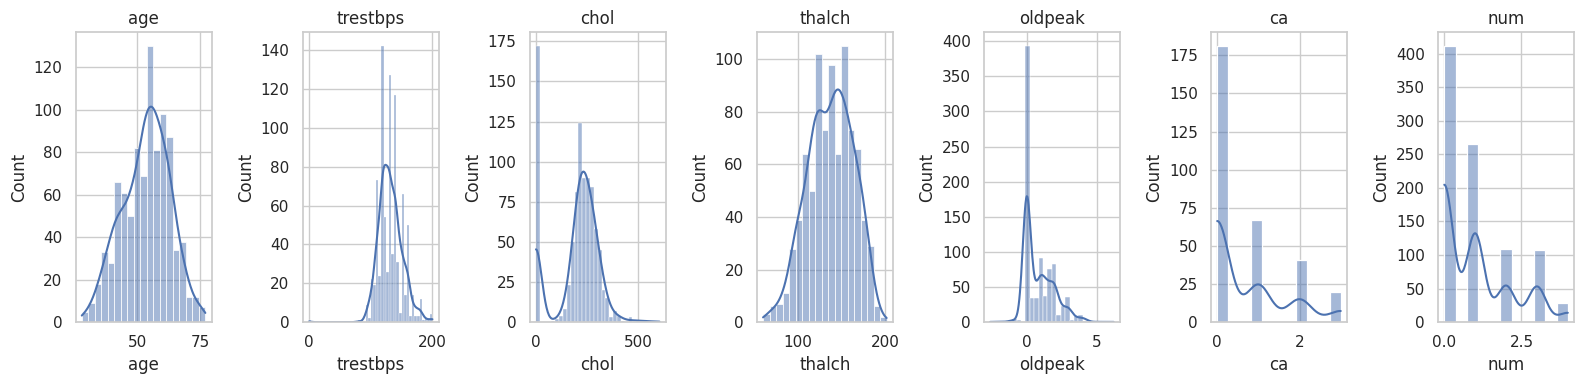

In [31]:
numerical_features = df.iloc[:,1:].select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(1, len(numerical_features), figsize=(16, 4))
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].grid(True)
plt.tight_layout()
plt.show()


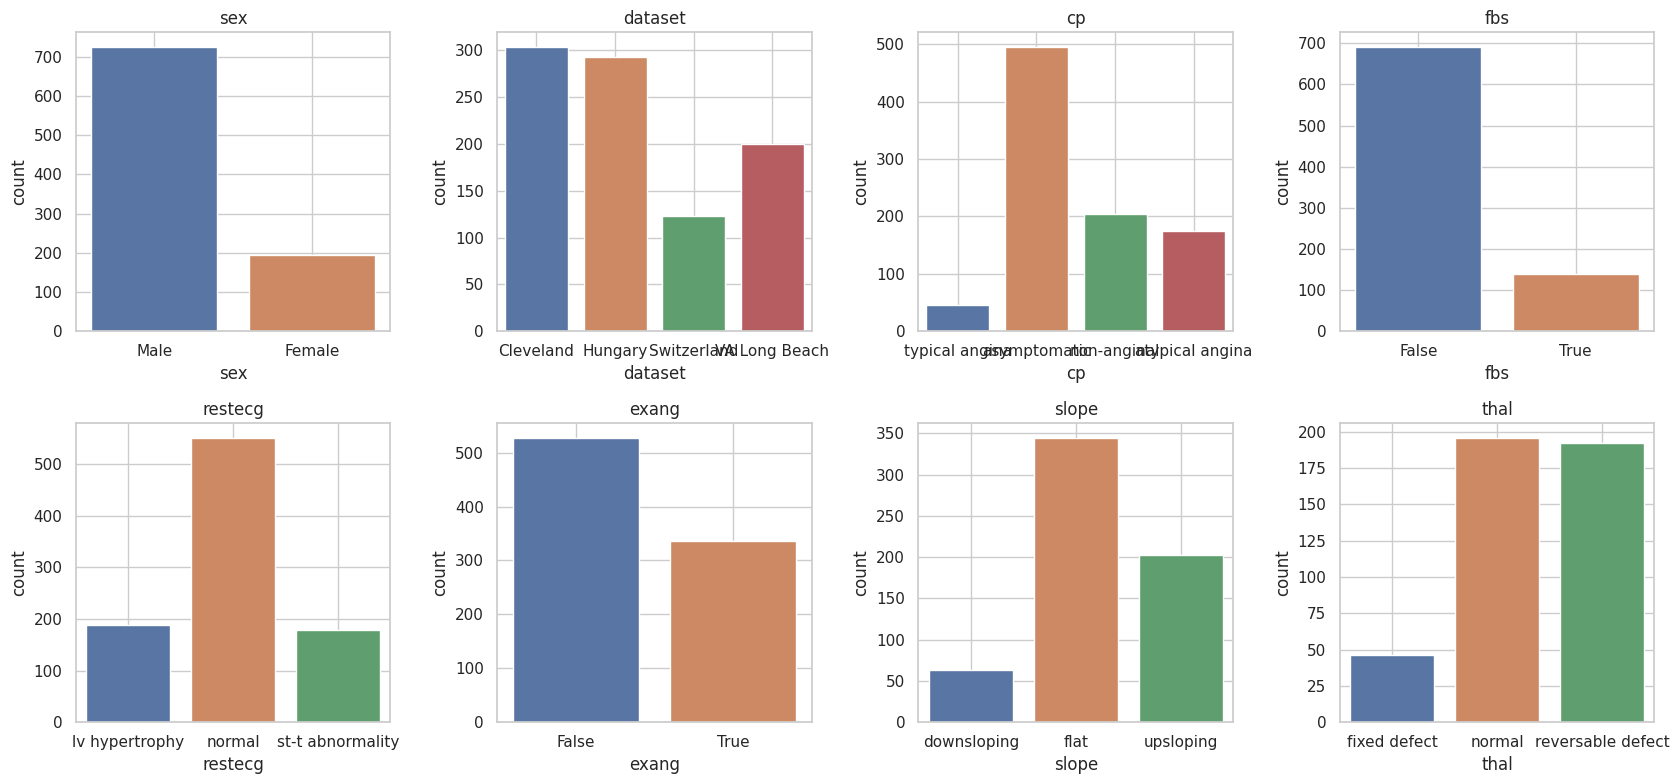

In [25]:
# Plot categorical features
categorical_features = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(2, 4, figsize=(17, 8))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].grid(True)
plt.tight_layout()
plt.show()


In [34]:
df.num.value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64